In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def computedisparity(left,right):
    max_disparity = 60
    size = left.shape
    
    kernelSize = 15    # This kernel defines a neighborhood for the pixel as a square in which it is centered
    disp = np.zeros(size)    # Disparity map is initialized
    
    for y in range(size[0]):    # For each column
        y_kernel = (max(0, y-int(kernelSize/2)), min(size[0]-1, y+int(kernelSize/2)))    # set the vertical boundaries of the kernel
        for x in range(size[1]):    # For each row
            x_kernel = (max(0, x-int(kernelSize/2)), min(size[1]-1, x+int(kernelSize/2)))    # set the horizontal boundaries of the kernel
            
            # Since the images are rectified, we will only search horizontally
            max_disp = min([max_disparity, size[1]-x_kernel[1]])    # We can't search further than the amount of pixels left to the right
            template = right[y_kernel[0]:y_kernel[1], x_kernel[0]:x_kernel[1]]    # This is the sub image, region that the kernel covers
            
            SSD = np.zeros(max_disp + 1)    # Similarity matrix of sum of squared differences
            for i in range(max_disp+1):
                block = left[y_kernel[0]:y_kernel[1], x_kernel[0]+i:x_kernel[1]+i]    # Sub-image on the left image to be compared
                SSD[i] = np.sum((template-block)**2)    # SSD value for each step of the scan
                
            disparity = np.amin(SSD)      # Get the minimum value in the cost matrix
            dis_index = np.argmin(SSD)    # Get the index of minimum value in the cost matrix
            
            if ((dis_index == 0) or (dis_index == max_disp)):
                disp[y,x] = dis_index
            else:
                C3 = SSD[dis_index - 1]
                C2 = SSD[dis_index]
                C1 = SSD[dis_index + 1]
                # Below is the sub-pixel disparity estimate formula
                disp[y, x] = dis_index - (0.5 * (C3 - C1) / (C1 + C3 - (2*C2)))
                
    return disp

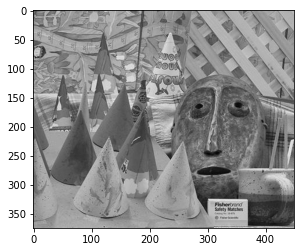

In [3]:
# Read the image and convert it to grayscale
left = cv2.imread('left.png')
left = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY)

plt.imshow(left, cmap='gray')

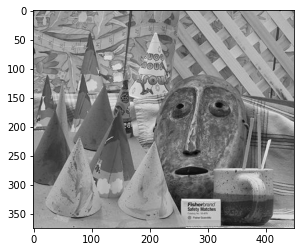

In [4]:
# Read the image and convert it to grayscale
right = cv2.imread('right.png')
right = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY)

plt.imshow(right, cmap='gray')

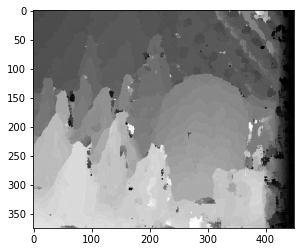

In [5]:
stereo = computedisparity(left, right)

plt.imshow(stereo, cmap='gray')